# Case Study - Sunlight in Austin

## Reading and Cleaning the data

Comparing observed weather data from two sources

1st) Climate normals of Austin, TX from 1981 - 2010

2nd) Contains hourly readings of many climate related measurements

**Reminder: read_csv()**

* Useful keyword options
    * names: assigning column labels
    * index_col: assigning index
    * parse_dates: parsing datetimes
    * na_values: parsing NaNs

In [1]:
import pandas as pd
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/5cac0469c3898e93392343c535d5c96c37ebd3c6/NOAA_QCLCD_2011_hourly_13904.txt'
                 ,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


**Notice:** Column names are not informative

## Re-assigning Column Names

In [2]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
column_labels = column_labels.split(',')
column_labels[:5]

['Wban', 'date', 'Time', 'StationType', 'sky_condition']

In [3]:
df.columns = column_labels
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [4]:
columns_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']
df_dropped = df.drop(columns_to_drop, axis='columns')
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning and Tidying DateTime Data

In [5]:
# Convert the date column to string
df_dropped['date'] = df_dropped['date'].astype(str)

# Add leading zeroes zeros to the 'Time' column
df_dropped['Time'] = df_dropped['Time'].apply(lambda x: '{:0>4}'.format(x))

# Concatenate the new date and Time columns
date_string = df_dropped['date'] + df_dropped['Time']

# Concatenate the new date and Time columns
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times
df_clean = df_dropped.set_index(date_times)

df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning the numberic columns

In [6]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-6-20 09:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


In [7]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

In [8]:
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-6-20 09:00:00','dry_bulb_faren'])

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [9]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

# Statistical Exploratory Data Analysis

**Reminder: time series**
* Index Selection by date time
* Partial datetime selection
* Slicing ranges of datetimes

In [10]:
df_clean['2011-11-05'] # Entire Day
df_clean['2011-11']    # Entire month
df_clean['2011-11-01' : '2011-11-10'] # 10 days

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-11-01 00:53:00,13904,20111101,0053,12,CLR,10.00,49.0,9.4,47,8.0,44.0,6.7,83,0.0,000,29.62,30.14
2011-11-01 01:53:00,13904,20111101,0153,12,CLR,10.00,49.0,9.4,47,8.3,45.0,7.2,86,0.0,000,29.62,30.14
2011-11-01 02:53:00,13904,20111101,0253,12,CLR,10.00,47.0,8.3,46,7.7,45.0,7.2,93,0.0,000,29.60,30.13
2011-11-01 03:53:00,13904,20111101,0353,12,CLR,10.00,47.0,8.3,46,7.5,44.0,6.7,89,0.0,000,29.60,30.12
2011-11-01 04:53:00,13904,20111101,0453,12,CLR,10.00,45.0,7.2,45,6.9,44.0,6.7,96,0.0,000,29.59,30.12
2011-11-01 05:53:00,13904,20111101,0553,12,CLR,10.00,45.0,7.2,44,6.6,43.0,6.1,93,0.0,000,29.59,30.12
2011-11-01 06:53:00,13904,20111101,0653,12,CLR,7.00,45.0,7.2,45,6.9,44.0,6.7,96,0.0,000,29.59,30.13
2011-11-01 07:53:00,13904,20111101,0753,12,CLR,9.00,54.0,12.2,52,11.0,50.0,10.0,86,0.0,000,29.60,30.14
2011-11-01 08:53:00,13904,20111101,0853,12,CLR,10.00,62.0,16.7,57,13.8,53.0,11.7,73,5.0,180,29.62,30.14
2011-11-01 09:53:00,13904,20111101,0953,12,FEW055,10.00,71.0,21.7,62,16.4,55.0,12.8,57,15.0,170,29.62,30.13


## Signal Min, Max, Median

In [11]:
# Print the median of the dry_bulb_faren column
df_clean['dry_bulb_faren'].median()

72.0

In [12]:
# Print the median of the dry_bulb_faren column
# Range: '2011-Apr' : '2011-Jun'
df_clean.loc['2011-Apr' : '2011-Jun', 'dry_bulb_faren'].median()

78.0

In [13]:
# Print the median dry_bulb_faren column for the month of January
df_clean.loc['2011-Jan', 'dry_bulb_faren'].median()

48.0

## Signal Variance

In [14]:
# Downsample df_clean by day and aggregate by mean
daily_mean_2011 = df_clean.resample('D').mean()
daily_mean_2011.tail()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-12-27,13904,12,44.833333,32.125000,4.458333
2011-12-28,13904,12,45.750000,35.166667,5.375000
2011-12-29,13904,12,50.320000,35.600000,4.480000
2011-12-30,13904,12,52.541667,37.875000,5.500000
2011-12-31,13904,12,54.458333,42.416667,5.416667


In [15]:
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values
'''
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate

difference.mean()
'''

"\n# Downsample df_climate by day and aggregate by mean: daily_climate\ndaily_climate = df_climate.resample('D').mean()\n\n# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate\ndaily_temp_climate = daily_climate.reset_index()['Temperature']\n\n# Compute the difference between the two arrays and print the mean difference\ndifference = daily_temp_2011 - daily_temp_climate\n\ndifference.mean()\n"

In [16]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


### Weekly Average Temperature and Visibility


In [17]:
import matplotlib.pyplot as plt

In [18]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

In [19]:
# Print the output of weekly_mean.corr()
weekly_mean.corr()

,dry_bulb_faren
dry_bulb_faren,1.0


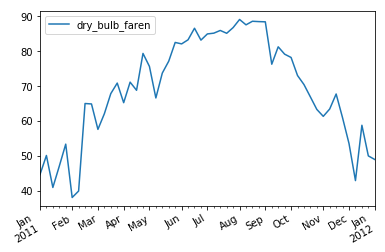

In [20]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()